In [119]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Lecture 14 ##

## Random Sampling ##

13825

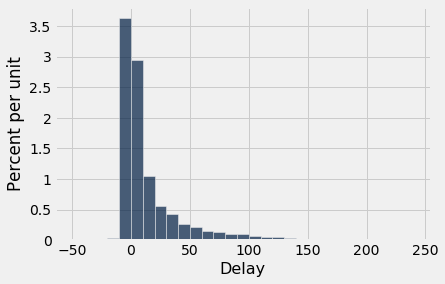

In [123]:
united = Table.read_table('united_summer2015.csv')
united_bins = np.arange(-50,250,10)
united.hist('Delay', bins=united_bins)
united.num_rows

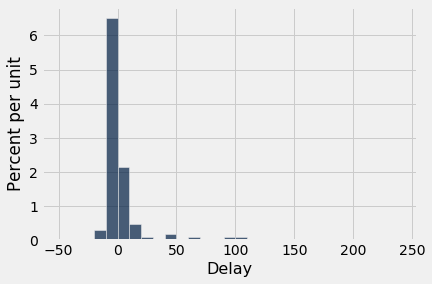

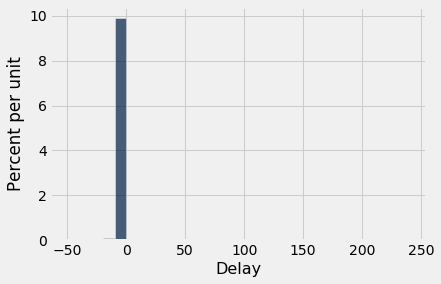

In [121]:
#two deterministic Sample - no randomness
deterministic = united.where("Date", are.equal_to("7/4/15"))
deterministic.hist('Delay', bins=united_bins)

deterministic2 = united.where('Delay', are.below(0))
deterministic2.hist('Delay', bins=united_bins)

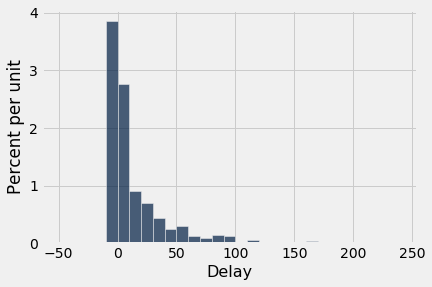

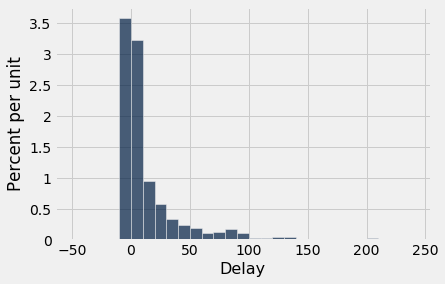

In [122]:
#Random Samples
united.sample(1000).hist('Delay', bins=united_bins)
united.sample(1000, with_replacement = False).hist('Delay', bins=united_bins)

## Distributions ##

In [124]:
die = Table().with_column('Face', np.arange(1, 7))
die

Face
1
2
3
4
5
6


In [125]:
die_bins = np.arange(0.5,7,1) #to make these histograms pretty

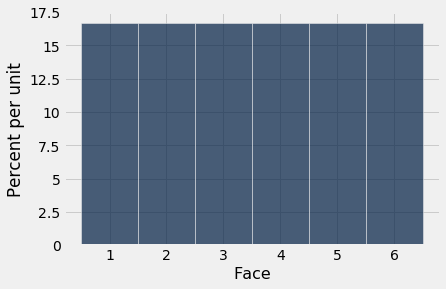

In [126]:
#Probability Distribution of the result of rolling a die
die.hist('Face',bins=die_bins)

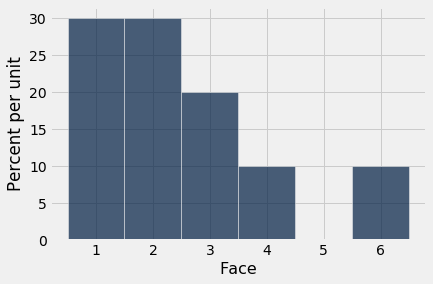

In [130]:
#rolling a die = sampling from the probability distribution of the faces
die.sample(10).hist(bins=die_bins)

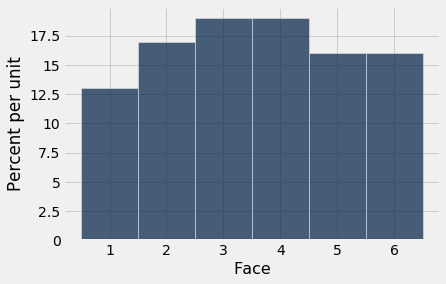

In [131]:
die.sample(100).hist(bins=die_bins)

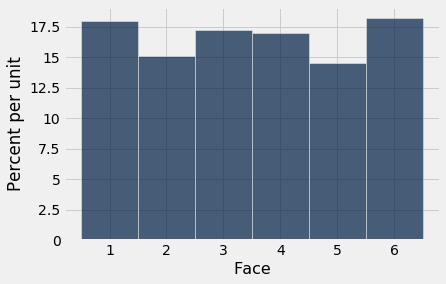

In [132]:
die.sample(1000).hist(bins=die_bins)

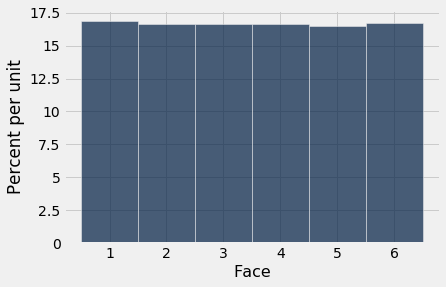

In [133]:
die.sample(50000).hist(bins=die_bins)

## Large Random Samples ##

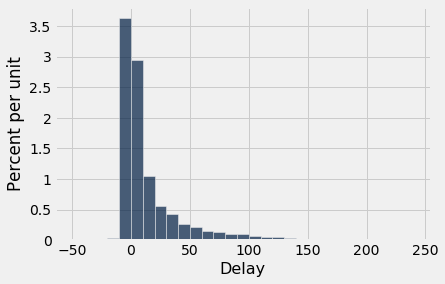

In [134]:
#original data
united.hist('Delay', bins=united_bins)

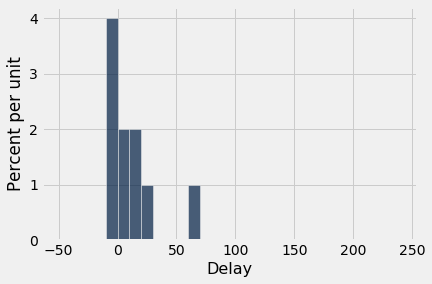

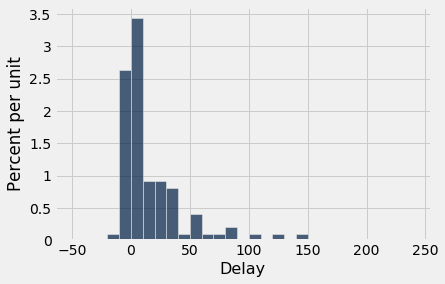

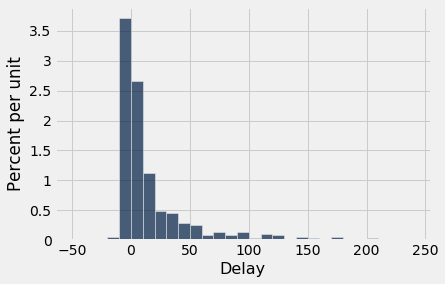

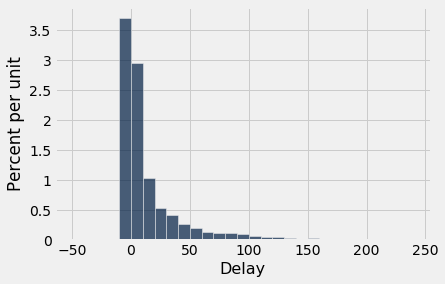

In [135]:
united.sample(10).hist('Delay', bins=united_bins)
united.sample(100).hist('Delay', bins=united_bins)
united.sample(500).hist('Delay', bins=united_bins)
united.sample(5000).hist('Delay', bins=united_bins)


## Distributions of Statistics ##

In [141]:
#statistic: proportion of 6s in 100 rolls of a die
hundred_rolls = die.sample(100)
hundred_rolls

Face
2
2
2
3
2
2
5
1
1
6


In [142]:
proportion_sixes = np.count_nonzero(hundred_rolls.column('Face') == 6)/hundred_rolls.num_rows
proportion_sixes

0.12

In [143]:
#let's not think about the distribution of the rolls
#hundred_rolls.hist(bins=die_bins)

#instead, we write a function that calculates a statistic from 100 rolls
def prop_sixes():
    hundred_rolls = die.sample(100)
    proportion_sixes = np.count_nonzero(hundred_rolls.column('Face') == 6)/hundred_rolls.num_rows
    return proportion_sixes

In [159]:
prop_sixes() #run this cell a bunch of times

0.18

In [161]:
# make python run this for us lots of times
simulated_proportions = make_array()
for i in np.arange(5000):
    one_result = prop_sixes()
    simulated_proportions = np.append(simulated_proportions, one_result)

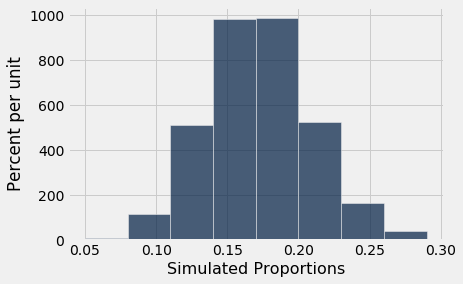

In [162]:
Table().with_column('Simulated Proportions', simulated_proportions).hist('Simulated Proportions', bins=np.arange(0.05,0.3,0.03))

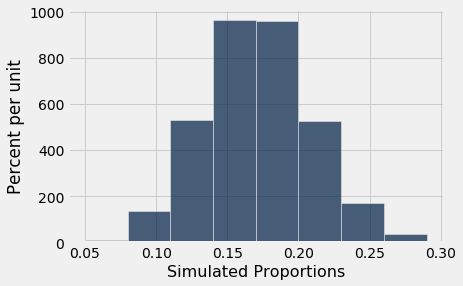

In [163]:
#this time, 15000 repetitions
#so we should be even closer to the theoretical distribution of this statistic
simulated_proportions2 = make_array()
for i in np.arange(15000):
    one_result = prop_sixes()
    simulated_proportions2 = np.append(simulated_proportions2, one_result)
Table().with_column('Simulated Proportions', simulated_proportions2).hist('Simulated Proportions', bins=np.arange(0.05,0.3,0.03))


### A different statistic ###

In [164]:
#a weird statistic: absolute value of difference between mean and median in 100 rolls
def simulate_and_get_weird_stat():
    hundred_rolls = die.sample(100)
    one_stat = abs(np.mean(hundred_rolls.column('Face')) - np.median(hundred_rolls.column('Face')))
    return one_stat


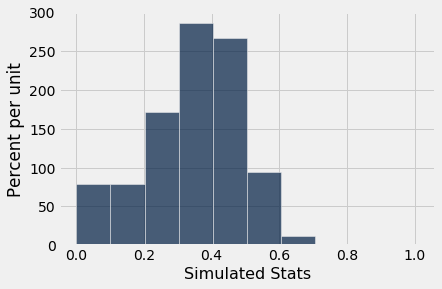

In [166]:
stats = make_array()
for i in np.arange(10000):
    one_result = simulate_and_get_weird_stat()
    stats = np.append(stats, one_result)

Table().with_column('Simulated Stats', stats).hist('Simulated Stats')

### Another statistic distribution - back to flights ###

In [197]:
def flight_sample_mean():
    sample = united.sample(500)
    return np.mean(sample.column('Delay'))

In [209]:
flight_sample_mean()

14.922

In [210]:
means = make_array()
for i in np.arange(1000):
    one_sample_mean = flight_sample_mean()
    means = np.append(means, one_sample_mean)
    

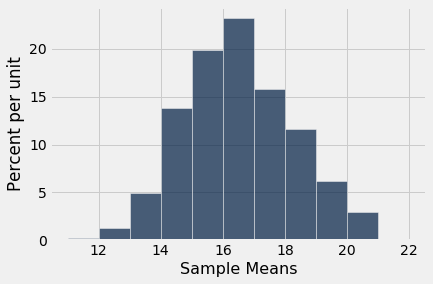

In [211]:
Table().with_column('Sample Means', means).hist('Sample Means', bins=np.arange(11,23,1))

### Gary's Model ###

In [ ]:
#question: what's the distribution of the # of heads in 10 flips of a fair coin?

#experiment: 10 flips of a fair coin

#statistic of interest: number of heads

#strategy: approximate the probability distribution by simulating the experiment lots of times

In [247]:
urn = make_array(0.5, 0.25, 0.25) #half red, 1/4 blue, 1/4 yellow
sample_proportions(100000000, urn) * 100000000


array([50006651., 24993596., 24999753.])

In [248]:
def ten_flips():
    '''a function that returns the number of heads in ten flips of a fair coin'''
    model = make_array(0.5, 0.5) #1/2 heads, 1/2 tails
    ten_flips_proportions = sample_proportions(10, model)
    num_heads = ten_flips_proportions.item(0)*10
    return num_heads

In [273]:
ten_flips()

4.0

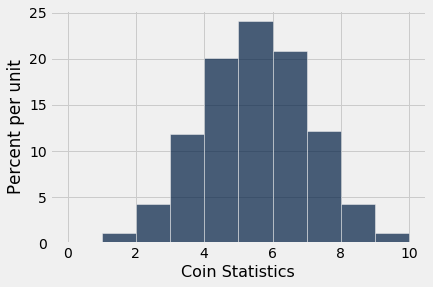

In [282]:
repetitions = 5000 #does this count as "lots of times?"

coin_stats = make_array()

for i in np.arange(repetitions):
    one_statistic = ten_flips()
    coin_stats = np.append(coin_stats, one_statistic)
    
Table().with_column('Coin Statistics', coin_stats).hist()